# Hidden Markov Model with `hmmlearn`
> [hmmlearn documentation](https://hmmlearn.readthedocs.io/en/latest/index.html)

### Import libraries

In [1]:
!pip3 install https://github.com/hmmlearn/hmmlearn/archive/refs/tags/0.2.8.tar.gz

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/hmmlearn/hmmlearn/archive/refs/tags/0.2.8.tar.gz
  Preparing metadata (setup.py) ... done


In [2]:
from collections import defaultdict
import itertools
import math
import pickle
import random
import urllib

from hmmlearn.hmm import CategoricalHMM, GaussianHMM, PoissonHMM
# from hmmlearn.hmm import GaussianHMM, MultinomialHMM
from hmmlearn.base import ConvergenceMonitor
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import as_strided as ast
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

plt.style.use('seaborn-white')

In [3]:
# Ref https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(y_true, y_pred, target_names=None,
                          title='Confusion matrix', cmap=plt.get_cmap('Blues'),
                          normalize=False, figsize=(8,6)):
    '''
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    '''
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=target_names)

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 1. Dishonest Casino
### 1.1. Evaluation
Probability of given observation with given model

In [4]:
model = CategoricalHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model
# => Start probability, transition probability, emission probability
model.startprob_ = [0.5, 0.5]  # n_components

model.transmat_ = [  # n_components x n_components
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [  # n_components x n_features
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [5]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [6]:
# Evaluation
model.score(X) # return log(probability)

-71.28707008782621

#### Exercise
Write your code in the cells below.
1. Change Observations
2. Evaluate the probability
3. Repeat 1~2 with different observations

In [ ]:
# 1. Change Observations



# 2. Evaluate the probability



# 3. Repeat 1~2 with different observations




### 1.2. Decoding
Most likely sequence of states with given observations and model

In [8]:
model = CategoricalHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model
# => Start probability, transition probability, emission probability
model.startprob_ = [0.5, 0.5]  # n_components

model.transmat_ = [  # n_components x n_components
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [  # n_components x n_features
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [9]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [10]:
# Decoding
model.decode(X)

(-74.25710830623268,
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

#### Exercise
Write your code in the cells below.
1. Change Observations
2. Decode the observations
3. Repeat 1~2 with different observations

In [ ]:
# 1. Change Observations



# 2. Decode the observations



# 3. Repeat 1~2 with different observations




### 1.3. Learning
Most likely model with given observations

In [12]:
model = CategoricalHMM(n_components=2, verbose=True, n_iter=20)

In [13]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [14]:
# Learning
model.fit(X)

         1         -91.1813             +nan
         2         -67.4120         +23.7694
         3         -67.2248          +0.1871
         4         -66.9385          +0.2864
         5         -66.6083          +0.3302
         6         -66.3046          +0.3037
         7         -66.0317          +0.2729
         8         -65.7611          +0.2706
         9         -65.4722          +0.2889
        10         -65.1587          +0.3136
        11         -64.8280          +0.3307
        12         -64.5016          +0.3264
        13         -64.2088          +0.2928
        14         -63.9735          +0.2353
        15         -63.8034          +0.1701
        16         -63.6910          +0.1124
        17         -63.6213          +0.0696
        18         -63.5799          +0.0414
        19         -63.5558          +0.0241
        20         -63.5419          +0.0140


CategoricalHMM(n_components=2, n_iter=20,
               random_state=RandomState(MT19937) at 0x7F2DD42F3D40,
               verbose=True)

#### 1.3.1. Inside of the Trained Model

In [15]:
model.emissionprob_

array([[4.14415119e-04, 8.74119047e-02, 1.45480297e-01, 1.43040010e-01,
        4.13452797e-02, 5.82308094e-01],
       [9.35020205e-01, 1.05300049e-07, 6.62851667e-04, 8.50491798e-03,
        5.44038702e-02, 1.40805032e-03]])

In [16]:
model.startprob_

array([8.5251212e-28, 1.0000000e+00])

In [17]:
model.transmat_

array([[7.17941078e-01, 2.82058922e-01],
       [1.00000000e+00, 4.51072922e-14]])

### 1.4. Sampling
Predict next observations and states

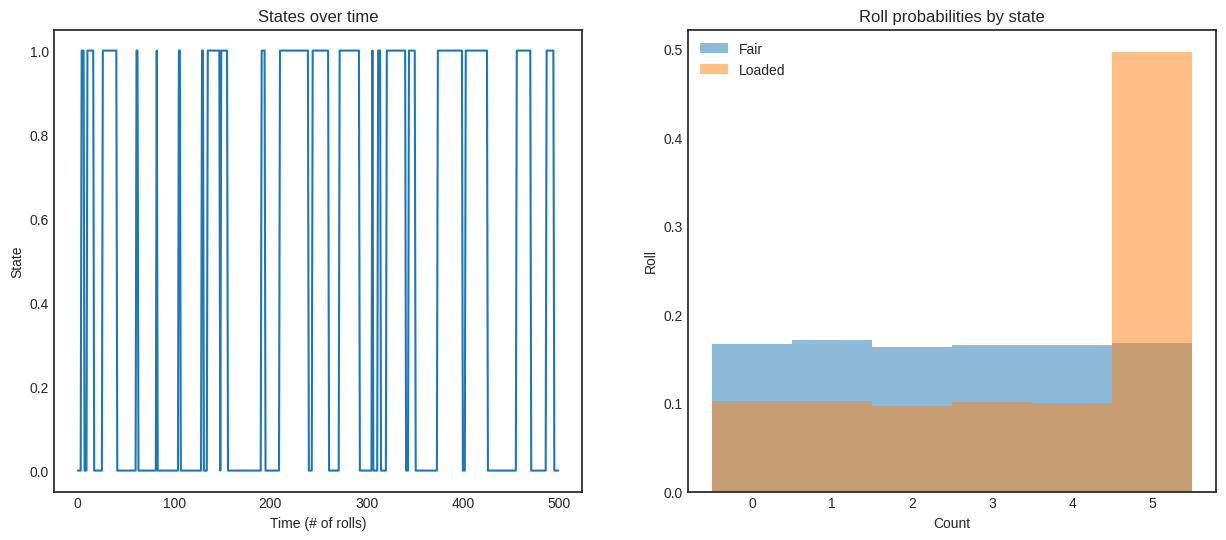

In [18]:
model = CategoricalHMM(n_components=2, random_state=0)

model.startprob_ = np.array([1.0, 0.0])

model.transmat_ = np.array([[0.95, 0.05],
                            [0.1, 0.9]])

model.emissionprob_ = np.array([[1/6,  1/6,  1/6,  1/6,  1/6,  1/6],
                                [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

observations, states = model.sample(n_samples=30000)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax = axes[0]
ax.plot(states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')

ax = axes[1]
ax.hist(observations[states == 0], label='Fair',   alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.hist(observations[states == 1], label='Loaded', alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()

plt.show()

### 1.5. Train with longer sequence
#### 1.5.1. Naive approach

In [19]:
X_train = observations[:observations.shape[0] // 2]
X_val = observations[observations.shape[0] // 2:]

In [20]:
def print_model(model):
    print('Emission Probability')
    print(model.emissionprob_)
    print()
    print('Start Probability')
    print(model.startprob_)
    print()
    print('Transition Probability')
    print(model.transmat_)

In [21]:
model = CategoricalHMM(n_components=2, random_state=0)  # don't init transition
model.fit(X_train)
print_model(model)

Emission Probability
[[0.16373943 0.14182711 0.12140816 0.16698572 0.11729663 0.28874295]
 [0.12128731 0.16058417 0.17571395 0.10575986 0.18987724 0.24677748]]

Start Probability
[0.00210038 0.99789962]

Transition Probability
[[0.50126528 0.49873472]
 [0.7366602  0.2633398 ]]


#### 1.5.2. Multiple trials

In [ ]:
# 1. Try multiple fitting with different random_state
# 2. Choose best model by evaluation (max model.score(X))











#### 1.5.3. Adding prior knowledge

In [23]:
models, scores = [], []
for idx in range(50):
    model = CategoricalHMM(n_components=2, random_state=idx, init_params='se')  # don't init transition
    model.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]),
                                np.random.dirichlet([0.1, 0.9])])
    model.fit(X_train)
    score = model.score(X_val)
    print(f'Model #{idx}\tScore: {score}')

    models.append(model)
    scores.append(score)

best_index = np.argmax(scores)
best_score = scores[best_index]
best_model = models[best_index]

print('Emission Probability')
print(best_model.emissionprob_)
print()
print('Start Probability')
print(best_model.startprob_)
print()
print('Transition Probability')
print(best_model.transmat_)

Model #0	Score: -26170.08535918969
Model #1	Score: -26307.49115314202
Model #2	Score: -26288.591519054437
Model #3	Score: -26287.650758455326
Model #4	Score: -26117.18283533816
Model #5	Score: -26289.05288846002
Model #6	Score: -26297.015135664427
Model #7	Score: -26117.644839123943
Model #8	Score: -26288.725564420794
Model #9	Score: -26135.147464065183
Model #10	Score: -26287.663764899717
Model #11	Score: -26110.480547912444
Model #12	Score: -26116.227919538458
Model #13	Score: -26288.72556015774
Model #14	Score: -26115.20416767205
Model #15	Score: -26124.814984496188
Model #16	Score: -26106.379198347317
Model #17	Score: -26153.05765964562
Model #18	Score: -26288.633680146668
Model #19	Score: -26299.12761738876
Model #20	Score: -26183.48992030815
Model #21	Score: -26189.046368098192
Model #22	Score: -26129.177805412088
Model #23	Score: -26284.26152691315
Model #24	Score: -26288.29661083945
Model #25	Score: -26288.633534215398
Model #26	Score: -26197.565429128124
Model #27	Score: -2627

#### 1.5.4. Decoding with trained model

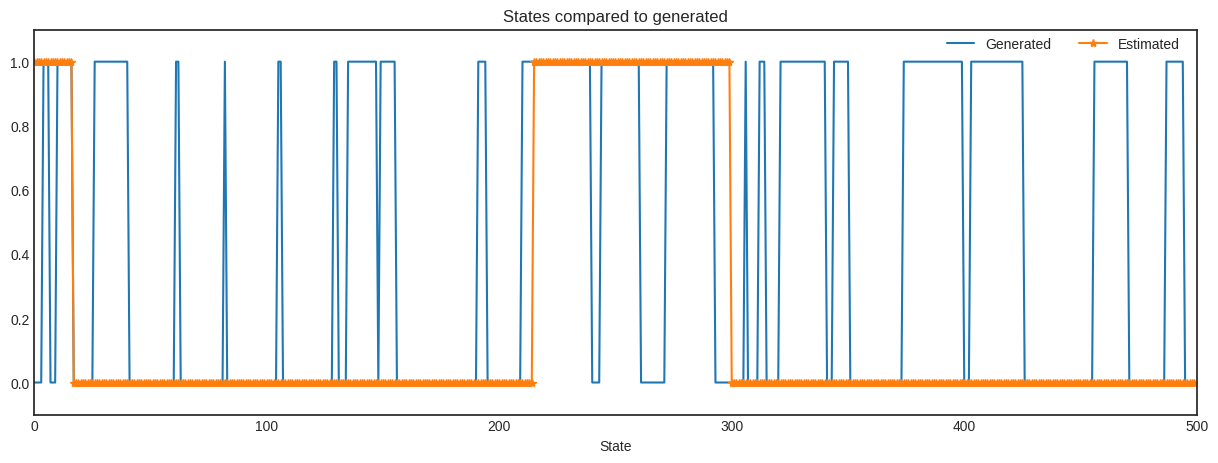

In [24]:
pred_states = best_model.predict(observations)

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(states[:500],      label='Generated')
ax.plot(pred_states[:500], marker='*', label='Estimated')

ax.set_xlim(0, 500)
ax.set_ylim(-0.1, 1.1)
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# observations)')
ax.set_xlabel('State')
ax.legend(ncol=2, loc=[0.78, 0.93])
plt.show()

---
## 2. Earthquakes
### 2.1. Load data
#### 2.1.1. Load data

In [25]:
# earthquake data from http://earthquake.usgs.gov/
years = np.arange(1900, 2007)
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])

#### 2.1.2. Plot data

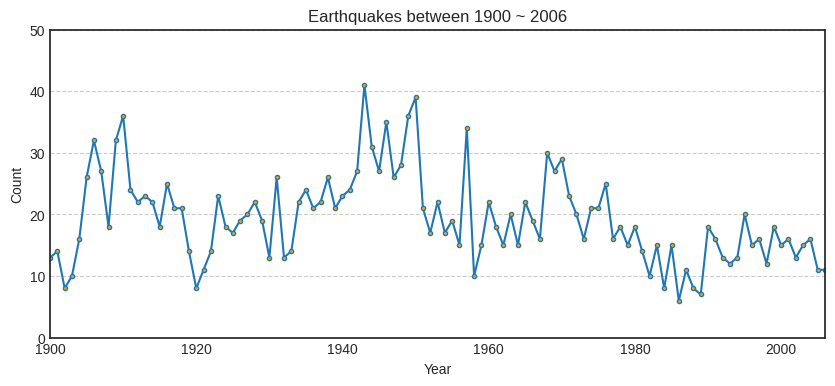

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(axis='y', linestyle='--')

ax.plot(years, earthquakes, marker='.', ms=6, mfc='orange')

ax.set_title('Earthquakes between 1900 ~ 2006')
ax.set_xlim(1900, 2006)
ax.set_ylim(0, 50)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.show()

### 2.2. Learning

In [27]:
models, scores = [], []
for n_components in range(1, 5):
    for idx in range(10):
        model = PoissonHMM(n_components=n_components, random_state=idx, n_iter=10)
        model.fit(earthquakes.reshape(-1, 1))
        score = model.score(earthquakes.reshape(-1, 1))
        print(f'Converged: {str(model.monitor_.converged):<7} Score: {score}')

        models.append(model)
        scores.append(score)

best_index = np.argmax(scores)
best_score = scores[best_index]
best_model = models[best_index]

print(f'The best model had a score of {best_score} and {best_model.n_components} components')

Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -391.9189281654951
Converged: True    Score: -341.89397049875447
Converged: True    Score: -341.88244772721396
Converged: True    Score: -342.14454823785394
Converged: True    Score: -341.89296748597104
Converged: True    Score: -341.8855538199331
Converged: True    Score: -342.28762276127594
Converged: True    Score: -342.5369292103581
Converged: True    Score: -341.88750207762195
Converged: True    Score: -341.87893633799735
Converged: True    Score: -342.9703881743685
Converged: True    Score: -343.0429169039876
Converged: True    Score: -342.0845203955183
Con

In [28]:
best_model.lambdas_

array([[19.47437151],
       [26.02533786],
       [13.13011672],
       [32.44501927]])

In [29]:
best_model.transmat_

array([[9.13521667e-01, 4.47730145e-02, 3.82207594e-02, 3.48455957e-03],
       [1.10319521e-01, 6.27773385e-01, 2.85431871e-05, 2.61878551e-01],
       [2.29004970e-02, 3.31189734e-02, 9.43980240e-01, 2.89655740e-07],
       [2.16656183e-01, 1.90638581e-01, 1.43035741e-08, 5.92705222e-01]])

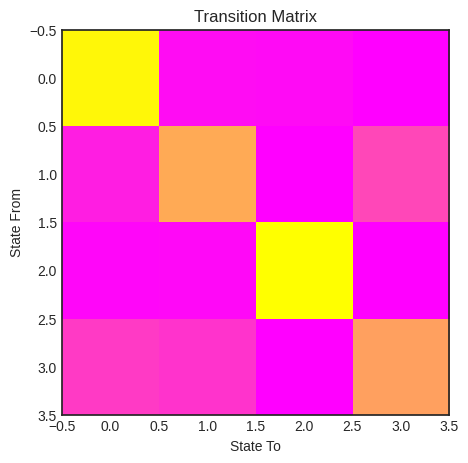

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(best_model.transmat_, aspect='auto', cmap='spring')

ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')
fig.show()

### 2.3. Estimating earthquakes

In [ ]:
# Estimate hidden states with trained model




# Get sequence of lambdas with hidden states
# model.lambdas_ contains corresponding lambda values




# Plot true earthquake counts and estimated lambdas





---
## 3. HAR with HMM
### 3.1. Using Segments
#### 3.1.1. Load data

In [32]:
### Modify the data path to your own setting ###
X, Y = pickle.load(urllib.request.urlopen('https://github.com/snuhcs/time-series-2022/raw/master/Data/HAR_segments_for_HMM.pkl'))
labels = sorted(list(set(Y)))

print(type(X), type(Y), len(X), len(Y))
print(type(X[0]), X[0].shape, labels)

<class 'list'> <class 'list'> 30 30
<class 'numpy.ndarray'> (3072, 3) ['running', 'standing', 'walking']


#### 3.1.2. Plot data

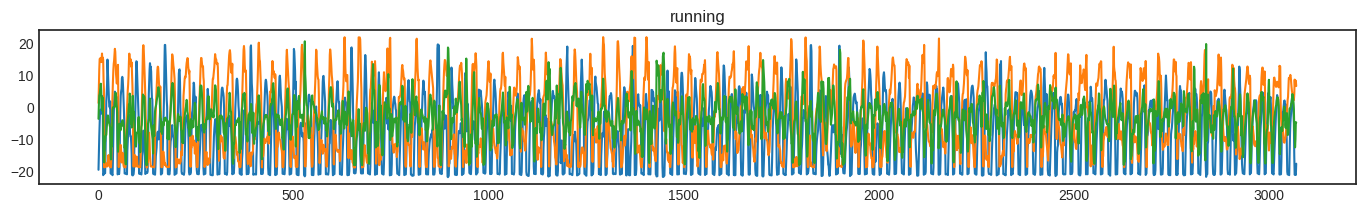

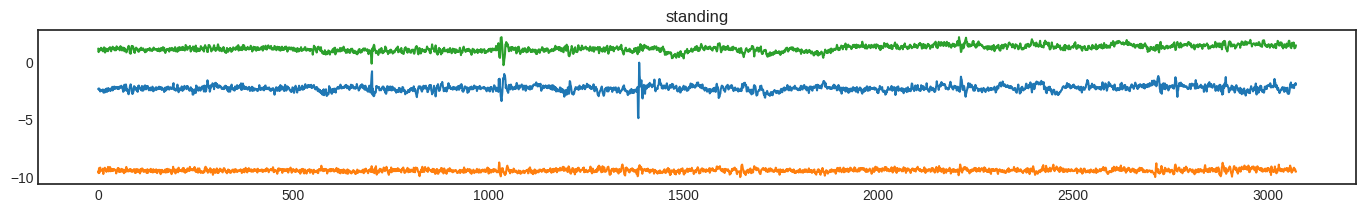

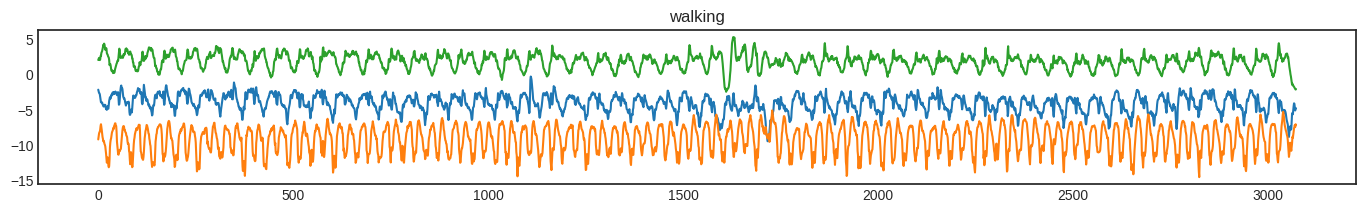

In [33]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(Y[0])
plt.plot(X[0])
plt.show()

plt.title(Y[10])
plt.plot(X[10])
plt.show()

plt.title(Y[20])
plt.plot(X[20])
plt.show()

#### 3.1.3. Train Model

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)
print(len(X_train), len(X_test))

21 9


In [35]:
# Make HMM models per motion classes
hmm_dict = {
    label: GaussianHMM(n_components=5, n_iter=30)
    for label in labels
}

# Process training data
X_train_dict = defaultdict(list)
for segment, label in zip(X_train, Y_train):
    X_train_dict[label].append(segment)

# Fit HMM labels with each label data
for label in labels:
    segments = X_train_dict[label]
    hmm_dict[label].fit(
        np.vstack(segments),
        [len(segment) for segment in segments]
    )

#### 3.1.5. Test Model

In [ ]:
def predict_sample(X):
    '''
    Evaluate with multiple HMMs (HMM model for each label)
    Choose most likely label
    '''
    # 1. Run evaluation for each hmm model
    # 2. Select most likely label
    
    
    
    
    
    pass

def predict(Xs):
    return [predict_sample(X) for X in Xs]
    
Y_pred = predict(X_test)
Y_true = Y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00         3
    standing       1.00      0.33      0.50         3
     walking       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       0.87      0.78      0.75         9



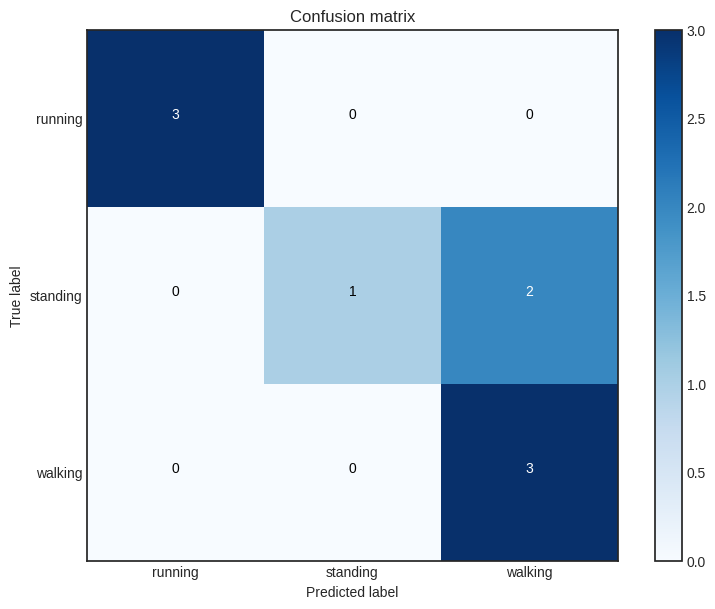

In [37]:
print(classification_report(Y_true, Y_pred))
plot_confusion_matrix(Y_true, Y_pred, target_names=labels)

### 3.2. Using Sliding Window
#### 3.2.1. Load data

In [38]:
### Modify the data path to your own setting ###
X_segments, Y_segments = pickle.load(urllib.request.urlopen('https://github.com/snuhcs/time-series-2022/raw/master/Data/HAR_segments_for_HMM.pkl'))
labels = sorted(list(set(Y_segments)))

print(type(X_segments), type(Y_segments), len(X_segments), len(Y_segments))
print(type(X_segments[0]), X_segments[0].shape, labels)

<class 'list'> <class 'list'> 30 30
<class 'numpy.ndarray'> (3072, 3) ['running', 'standing', 'walking']


#### 3.2.2. Apply sliding window

In [39]:
def sliding_window(X_segment, window_size, stride):
    X_windows = []
    for sidx in range(0, X_segment.shape[0], stride):
        if sidx + window_size <= X_segment.shape[0]:
            X_windows.append(X_segment[sidx:sidx+window_size])
    return X_windows


def segments_to_windows(X_segments, Y_segments, window_size=150, stride=50):
    X_windows, Y_windows = [], []
    for X_segment, Y_segment in zip(X_segments, Y_segments):
        X_windows_in_segment = sliding_window(X_segment, window_size, stride)
        X_windows += X_windows_in_segment
        Y_windows += [Y_segment] * len(X_windows_in_segment)
    return X_windows, Y_windows

In [40]:
X, Y = segments_to_windows(X_segments, Y_segments, window_size=150, stride=50)

print(type(X), type(Y), len(X), len(Y))
print(type(X[0]), X[0].shape, labels)

<class 'list'> <class 'list'> 1770 1770
<class 'numpy.ndarray'> (150, 3) ['running', 'standing', 'walking']


#### 3.2.3. Plot data

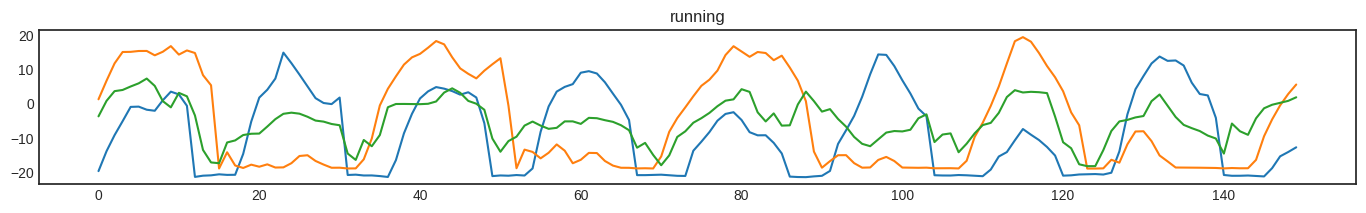

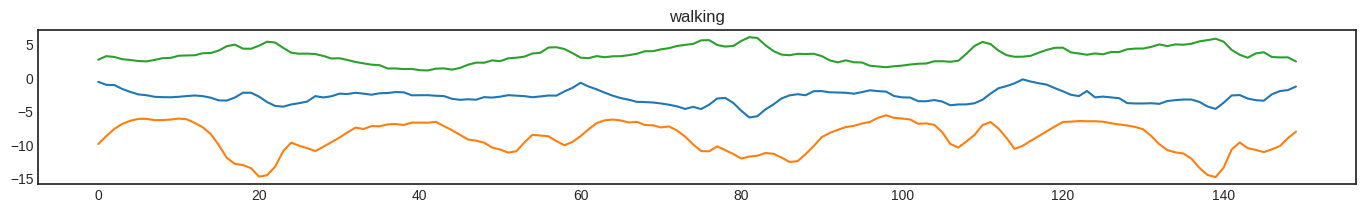

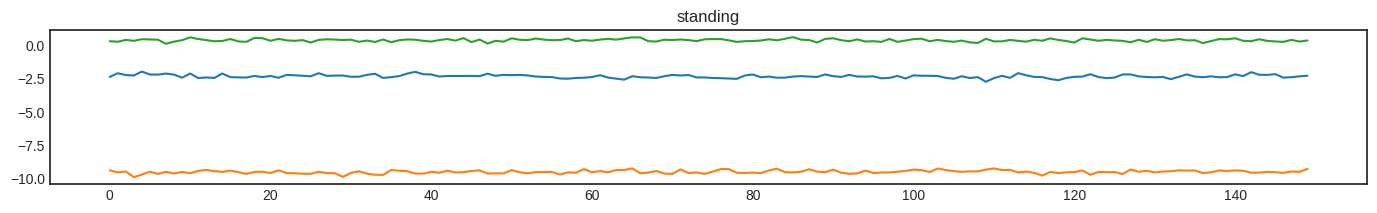

In [41]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(Y[0])
plt.plot(X[0])
plt.show()

plt.title(Y[500])
plt.plot(X[500])
plt.show()

plt.title(Y[1000])
plt.plot(X[1000])
plt.show()

#### 3.2.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False)
print(len(X_train), len(X_test))

1327 443


In [ ]:
# Make HMM models per motion classes




# Process training data




# Fit HMM labels with each label data





#### 3.2.5. Test Model

In [ ]:
print(classification_report(Y_true, Y_pred))
plot_confusion_matrix(Y_true, Y_pred, target_names=labels)